In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

Suponga que le han pedido averiguar si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido para los siguientes datos:

In [124]:
dataset_teams = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.","Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago","Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona","Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa","Atlanta","Washington","San.F","San.I","Seattle"]

dataset_beats = [5659, 5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559, 5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

dataset_runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556]

dataframe = pd.DataFrame({'teams': dataset_teams, 'beats': dataset_beats, 'runs': dataset_runs})

1. Obtener la distribución de los datos

distribution
             beats        runs
count    30.000000   30.000000
mean   5523.500000  693.600000
std      79.873067   82.479088
min    5417.000000  556.000000
25%    5448.250000  629.000000
50%    5515.500000  705.500000
75%    5575.000000  734.000000
max    5710.000000  875.000000


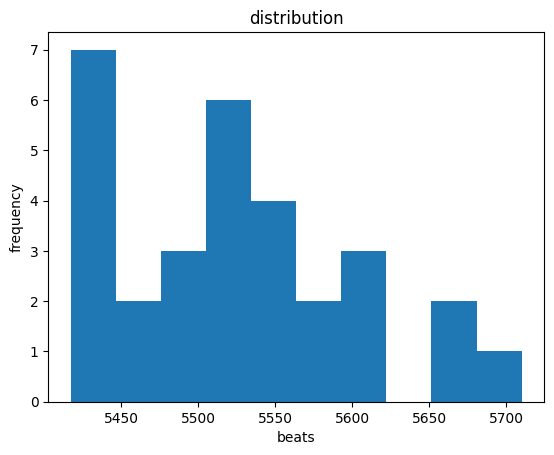

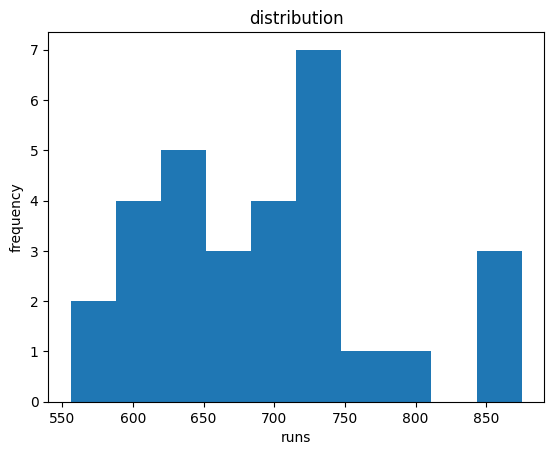

In [125]:
describe = dataframe.describe()
print("distribution")
print(describe)

plt.hist(dataframe['beats'], bins=10)
plt.title('distribution')
plt.xlabel('beats')
plt.ylabel('frequency')
plt.show()

plt.hist(dataframe['runs'], bins=10)
plt.title('distribution')
plt.xlabel('runs')
plt.ylabel('frequency')
plt.show()

2. Separar los datos de entrenamiento en 80/20

In [126]:
x = dataframe[['beats']]
y = dataframe['runs']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

3. Ajustar un modelo de regresión lineal

In [127]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

4. Escribir la recta de regresión obtenida con las estimaciones respectivas

In [128]:
intercept = model.intercept_
coefficients = model.coef_

line = f"y = {coefficients[0]:.2f}x + {intercept:.2f}"

print(line)

y = 0.64x + -2837.78


5. Obtener la gráfica de los datos y su recta de regresión

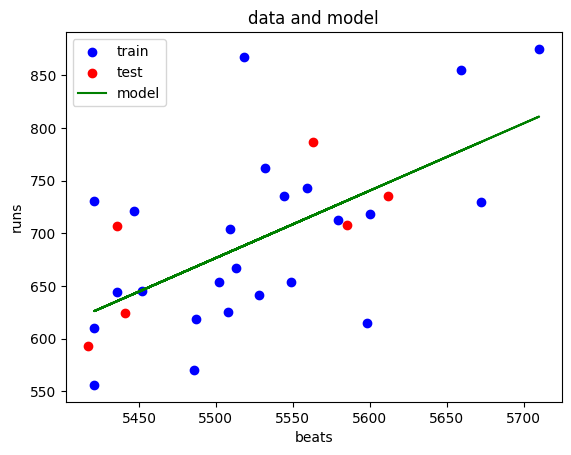

In [129]:
plt.scatter(x_train, y_train, color='blue', label='train')
plt.scatter(x_test, y_test, color='red', label='test')

plt.plot(x_train, model.predict(x_train), color='green', label='model')

plt.title('data and model')
plt.xlabel('beats')
plt.ylabel('runs')
plt.legend()

plt.show()

6. Obtenga las métricas: MAE, MSE, RMSE

In [130]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("mae:", mae)
print("mse:", mse)
print("rmse:", rmse)

mae: 37.158589869587935
mse: 1976.597374864583
rmse: 44.4589403254799


7. Concluir con los datos obtenidos y comentar la problemática planteada al principio

No es posible predecir con un grado de exactitud importante el resultado de futuros partidos basados en los datos proporcionados

P: Algoritmos de regresión lineal simple
R: Son un tipo de algoritmos de aprendizaje automático supervisado que se utilizan para modelar la relación entre una variable independiente (también conocida como variable predictora) y una variable dependiente (también conocida como variable objetivo o variable a predecir)

P: Quién o qué es la variable respuesta
R: También conocida como variable dependiente o variable objetivo, es la variable que se intenta predecir o modelar en un problema de regresión. Es la variable cuyo valor se desea estimar o pronosticar en función de otras variables independientes